- Choose Stakeholder: For whom are you performing this analysis (Every Door Real Estate)
- Business Understanding: at least 2 important parameters estimates as recomendations
- Data Understanding: Whats in this data, how relevant is this data
- Data Prep: Train/Test split, Nulls, Duplicates, Outlires, Log transformation, encoding variables (one-hot-encoding, binning), polynomial features, interation terms, SCALE
- At least one non numaric feature included in a model
- First simple model: what is your model-less baseline
- Interactive Modeling: Iterate by adding complexity( more columns, different interations:
- Each iteration of your model adheres to assumptions of liniear reg
    Linear Relationship, low Multicollinearity(VIF), Normal dis of   Errors(Q-Qplot)(lower the score the more), Homoskedasticity of Errors
- Interpreting models: check if your input variables are statistically significant. R2. 

- Jupiter notebook Flow: 
- Business Problem
- Data understanding
- Load data
- Initial exploration of data 
- Heat map
- Histograms to see how data is distributed
- Train-test-split
- Data cleaning of train
- Test for multicollinearity 
- use multicollinearity and business question to drop columns we don’t want to use
- Decide which categorical data to use, transform any we keep.
- Standardize data for distribution
- Run dummy regression - title model one
- Run 2nd regression model
- Test assumptions, decide what to do
- Run 3rd regression model
- Test assumptions, decide what to do
- Run another model if needed
- Test assumptions
- Interpret results
- Graph could be helpful here

# Business Understanding

Our Stakeholder is Every Door Real Estate. The year is 2016. They want to stand out in the competitive Seattle Housing Market and learn what factors for homes lead to better than average sale prices to focus their listing efforts on those homes.

* Import necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
import statsmodels.api as sm

In [2]:
#importing the dataset as df
df = pd.read_csv('data/kc_house_data.csv')

LMP notes - we should have a couple cells in here about exploring and reading the data -
df.head(), df.info(), df.isna().sum(), etc.

# Data Exploration

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- mostly complete data set! Some nulls in yr_rennovated, might have to take care of those if we determine this is relevant

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


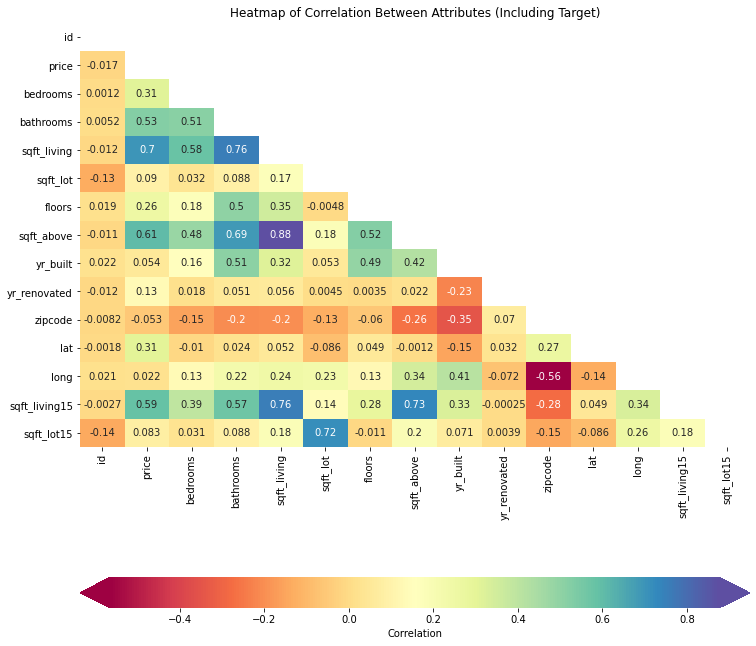

In [7]:
heatmap_data = df
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(

    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"},
    cmap='Spectral'
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Observations: Collineraity is when one feature variable in a regression model is highly linearly correlated with another feature variable. there are collinearity between: 
1) [sqft_living] and ['sqft_above','bathrooms','sqft_living15'] correlation
2) [sqft_lot] and [sqft_lot_15] correlation
3) [sqft_above] and [bathrooms] correlation
Based on this we may choose to drop sqft_living15, sqft_above and sqft_lot15

* Based on the initial exploration above we can see that the following variables are highly correlated with each other (>.7) indicating multicollinearity

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


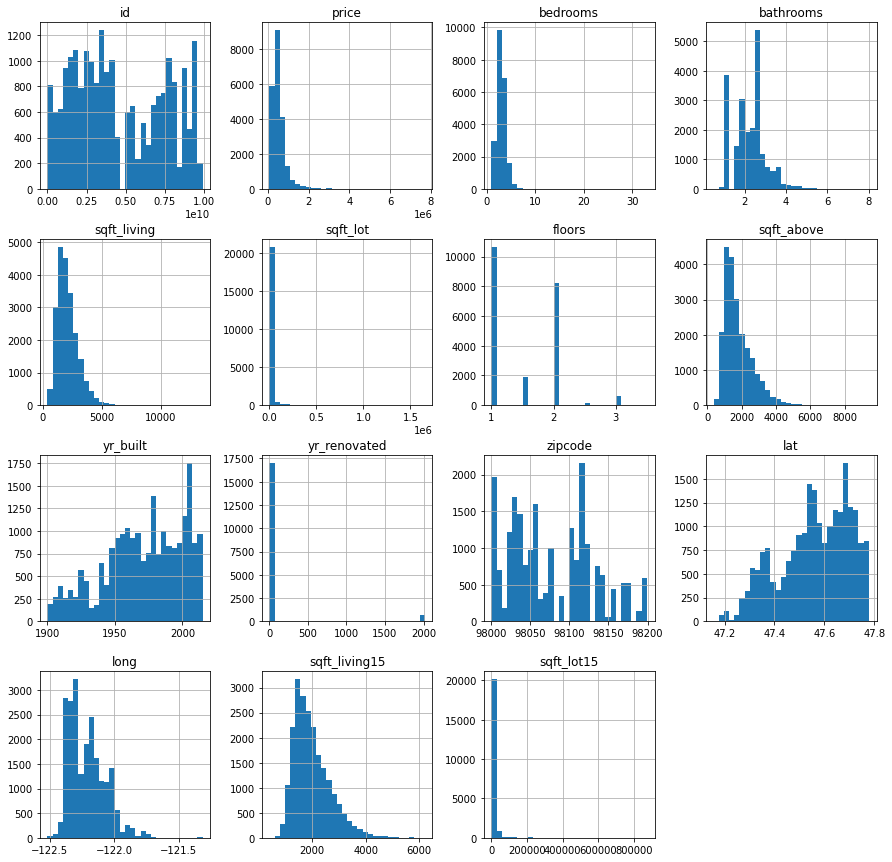

In [8]:
# Plot all features
df.hist(figsize  = [15, 15],bins=30) 
plt.show();

In [9]:
salecorr = df.corr()['price'].sort_values(ascending=False)
salecorr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

# Training Data

* Splitting data into our "training" set and "testing" set. The training set is 75% of the data and the testing set is 25% per default train_test_split()

In [10]:
y = df["price"]
X = df.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Cleaning Data

In [11]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_train_non_numeric = X_train.select_dtypes(exclude=['int64', 'float64'])
print(X_train_non_numeric.columns)
print(X_train_numeric.columns)

Index(['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement'], dtype='object')
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [12]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
X_train['waterfront'] = X_train.waterfront.fillna('N/A')

waterfront_or = X_train.loc[:, ['waterfront']]

encoder_water = OrdinalEncoder()

encoder_water.fit(waterfront_or)

encoder_water.categories_[0]

water_trans = encoder_water.transform(waterfront_or)

water_trans = water_trans.flatten()

X_train['waterfront'] = water_trans

In [14]:
X_train.waterfront.value_counts()

1.0    14330
0.0     1756
2.0      111
Name: waterfront, dtype: int64

In [15]:
X_train.drop(columns='waterfront', inplace=True)

Since only .0067% of the houses are waterfront, it would not be a good predicter variable so we dropped waterfront. 

In [16]:
X_train["view"] = X_train["view"].fillna("N/A")
view = X_train[["view"]]
ohe = OneHotEncoder(categories="auto",sparse=False,handle_unknown="ignore")
ohe.fit(view)
view_trans = ohe.transform(view)
view_trans1= pd.DataFrame(view_trans, columns=ohe.categories_[0],index=X_train.index)

In [17]:
X_train.view.value_counts()

NONE         14585
AVERAGE        695
GOOD           378
FAIR           245
EXCELLENT      245
N/A             49
Name: view, dtype: int64

In [18]:
X_train.drop(columns='view', inplace=True)

* We are dropping "view" column since 67% of the values are none, it would not be a good predictor variable.

In [19]:
X_train.yr_renovated.value_counts()

0.0       12771
2014.0       49
2005.0       24
2003.0       23
2013.0       23
          ...  
1959.0        1
1944.0        1
1956.0        1
1951.0        1
1950.0        1
Name: yr_renovated, Length: 66, dtype: int64

In [20]:
X_train.yr_renovated.isnull().sum()

2879

In [21]:
(2879+12771)/21957

0.7127567518331284

In [22]:
X_train.drop(columns='yr_renovated', inplace=True)

* We are dropping "yr_renovated" column since 71% of the values are none, renovated homes do not have enough data and would not be a good predictor variable.

In [23]:
X_train = X_train.drop(columns=['lat', 'long','id', 'date'])

Latitude and longitude are specific points on a map and all unique, making predictions difficult to base off these variables. We have zip code data that will better serve for location for our modeling. This is why we’re dropping lat and long. We are droping ID because it is a unique id for the home which we do not need for our modeling. Dropping date: our stakeholders are looking for what home factors lead to better than average sale prices for them to choose to list.

In [24]:
condition = X_train[["condition"]]
ohe = OneHotEncoder(categories="auto",sparse=False,handle_unknown="ignore")
ohe.fit(condition)
condition_trans = ohe.transform(condition)
condition_trans1= pd.DataFrame(condition_trans, columns=ohe.categories_[0],index=X_train.index)
condition_trans1
X_train.drop("condition", axis=1, inplace=True)
X_train = pd.concat([X_train, condition_trans1], axis=1)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,Average,Fair,Good,Poor,Very Good
6405,3,2.50,1880,4499,2.0,8 Good,1880,0.0,1993,98029,2130,5114,1.0,0.0,0.0,0.0,0.0
937,3,2.50,2020,6564,1.0,7 Average,1310,710.0,1994,98042,1710,5151,1.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,9 Better,3960,760.0,1975,98027,2160,219542,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,7 Average,1430,0.0,1949,98117,1430,3880,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,8 Good,1740,530.0,1980,98042,2310,41606,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,7 Average,2230,0.0,2004,98065,2230,6088,1.0,0.0,0.0,0.0,0.0
21575,4,2.75,2770,3852,2.0,8 Good,2770,0.0,2014,98178,1810,5641,1.0,0.0,0.0,0.0,0.0
5390,4,1.50,1530,9000,1.0,6 Low Average,1530,0.0,1976,98014,1520,8500,0.0,0.0,1.0,0.0,0.0
860,1,0.75,380,15000,1.0,5 Fair,380,0.0,1963,98168,1170,15000,1.0,0.0,0.0,0.0,0.0


- Confidence interval of our Price to find where most of our values are located to get rid of any outliers. 

# Scaling

In [25]:
ss = StandardScaler()
X_train.drop(columns=['grade', 'sqft_basement'], inplace=True)
ss.fit(X_train)
xtrain_scaled = ss.transform(X_train)

# Models

In [26]:
#setting up a dummy regressor - this sets up a baseline to use to compare 
#linear regression models we build going forward
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_train, y_train)


0.0